### Step 1: Mount Google Drive and Access Project Folder
We begin by mounting Google Drive to access the project files and dataset used in Milestone 1.  
The folder contains the preprocessed Flickr30k dataset, baseline notebook, and scripts from the previous milestone.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

# go to your project folder
%cd /content/drive/MyDrive/Generative Project/NNDL-GenerativeProject-main
!ls


Mounted at /content/drive
/content/drive/MyDrive/Generative Project/NNDL-GenerativeProject-main
baseline_text_to_embedding.ipynb  README.md
data				  requirements.txt
outputs				  validate_clip_alignment.py
preprocess_flickr30k.py


In [2]:
!pip install torch torchvision transformers diffusers accelerate matplotlib pandas pillow


In [3]:
# --- Environment setup ---
# Installing core libraries for text encoding and diffusion-based generation
!pip install --quiet torch torchvision torchaudio
!pip install --quiet diffusers==0.30.0 transformers accelerate
!pip install --quiet pandas matplotlib pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 22.8 MB/s eta 0:00:00


### Step 2: Verify Dataset and Prepare Output Directory
Before proceeding, we check that the Flickr30k dataset (cleaned in Milestone 1) is available in the `data/` folder.  
We also create a new directory `outputs/milestone2/` to save the generated images and logs.


In [4]:
import os

# confirm dataset path
data_path = "data"
output_path = "outputs/milestone2"
os.makedirs(output_path, exist_ok=True)

print("✅ Data folder contents:")
print(os.listdir(data_path))
print("\n📁 Output folder ready at:", output_path)


✅ Data folder contents:
['flickr30k']

📁 Output folder ready at: outputs/milestone2


### Step 4: Baseline Text-to-Image Generation
We now perform baseline text-to-image synthesis using the pretrained Stable Diffusion model (v1-5). Each text prompt is generated at three different guidance scales (5.0, 7.5, and 10.0) to observe how the conditioning strength affects image realism and adherence to the textual description. All outputs and metadata are saved in the folder `outputs/milestone2/` for further analysis.


In [5]:
# Check if Colab GPU is active
import torch
print("CUDA available:", torch.cuda.is_available())
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")


CUDA available: True
GPU name: Tesla T4


In [6]:
# Baseline text-to-image generation using Stable Diffusion

from diffusers import StableDiffusionPipeline
import torch
import pandas as pd
from PIL import Image
import os

# load the pretrained Stable Diffusion model
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
).to("cuda")

# sample prompts for baseline testing
prompts = [
    "a man riding a red bicycle",
    "a dog playing in the snow",
    "a woman in a red dress walking on a street",
    "a group of people hiking near a waterfall",
    "a blue car parked beside a lake"
]

# run generations for multiple guidance scales
guidance_values = [5.0, 7.5, 10.0]
log_data = []

for prompt in prompts:
    for g in guidance_values:
        image = pipe(prompt, guidance_scale=g, num_inference_steps=50).images[0]
        fname = f"outputs/milestone2/{prompt.replace(' ', '_')}_guid{g}.png"
        image.save(fname)
        log_data.append([prompt, g, 50, fname])

# record generation details
df = pd.DataFrame(log_data, columns=["Prompt", "Guidance", "Steps", "Filename"])
df.to_csv("outputs/milestone2/training_log.csv", index=False)

print("Images generated and saved in outputs/milestone2/")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Images generated and saved in outputs/milestone2/


### Step 5: Visualize Generated Samples
We now visualize a subset of the generated images along with their corresponding text prompts. This qualitative inspection helps evaluate how closely the diffusion model output aligns with the semantic meaning of each caption. It also allows us to compare visual quality across different guidance scales.


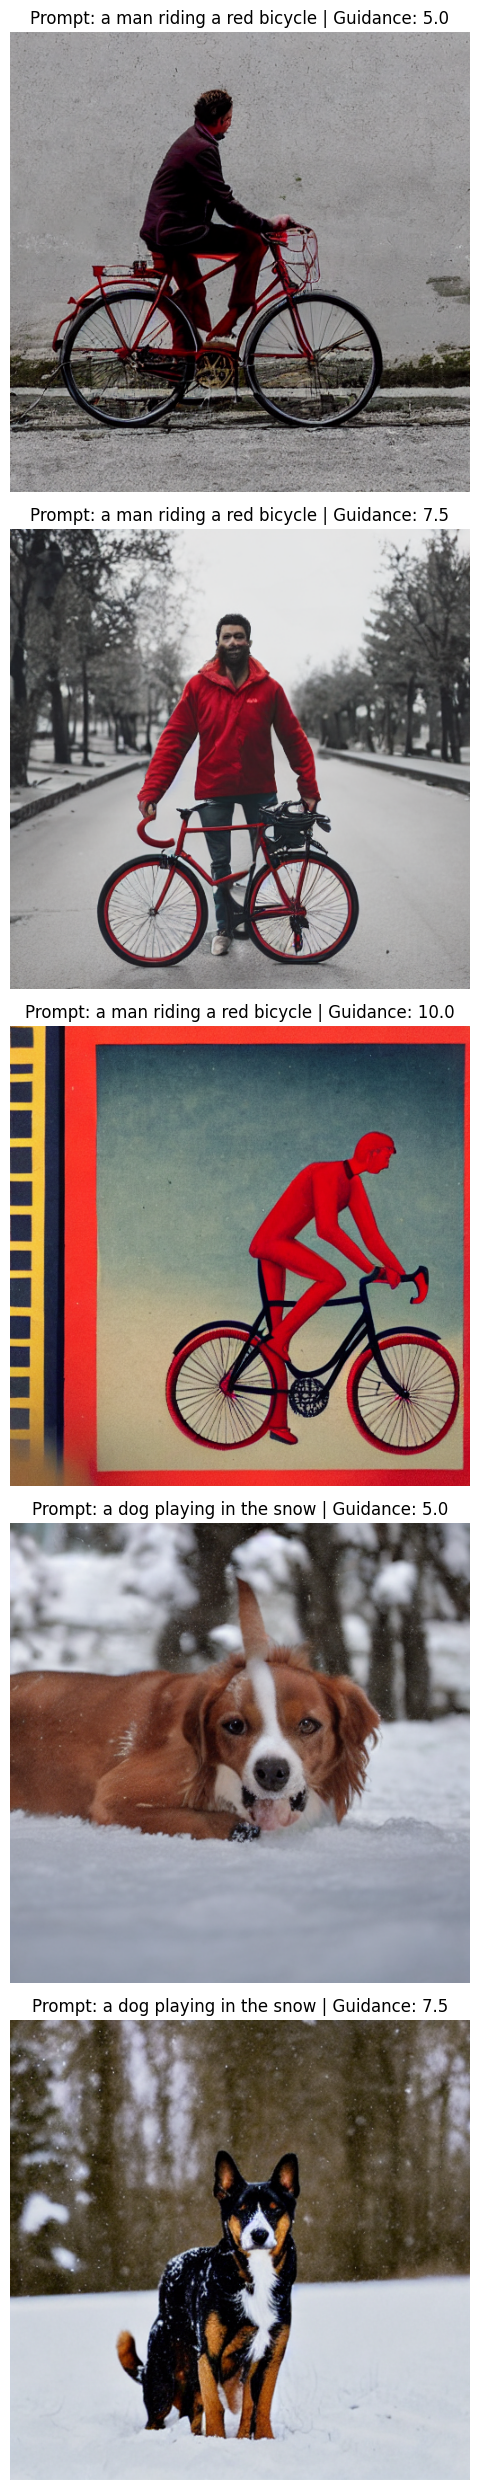

In [7]:
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

# read the generation log
df = pd.read_csv("outputs/milestone2/training_log.csv")

# show a few samples for quick inspection
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(7, 25))
for i, row in enumerate(df.head(5).itertuples()):
    img = Image.open(row.Filename)
    axes[i].imshow(img)
    axes[i].set_title(f"Prompt: {row.Prompt} | Guidance: {row.Guidance}", fontsize=12)
    axes[i].axis("off")

plt.tight_layout()
plt.show()


In [8]:
import os
len(os.listdir("outputs/milestone2"))


16

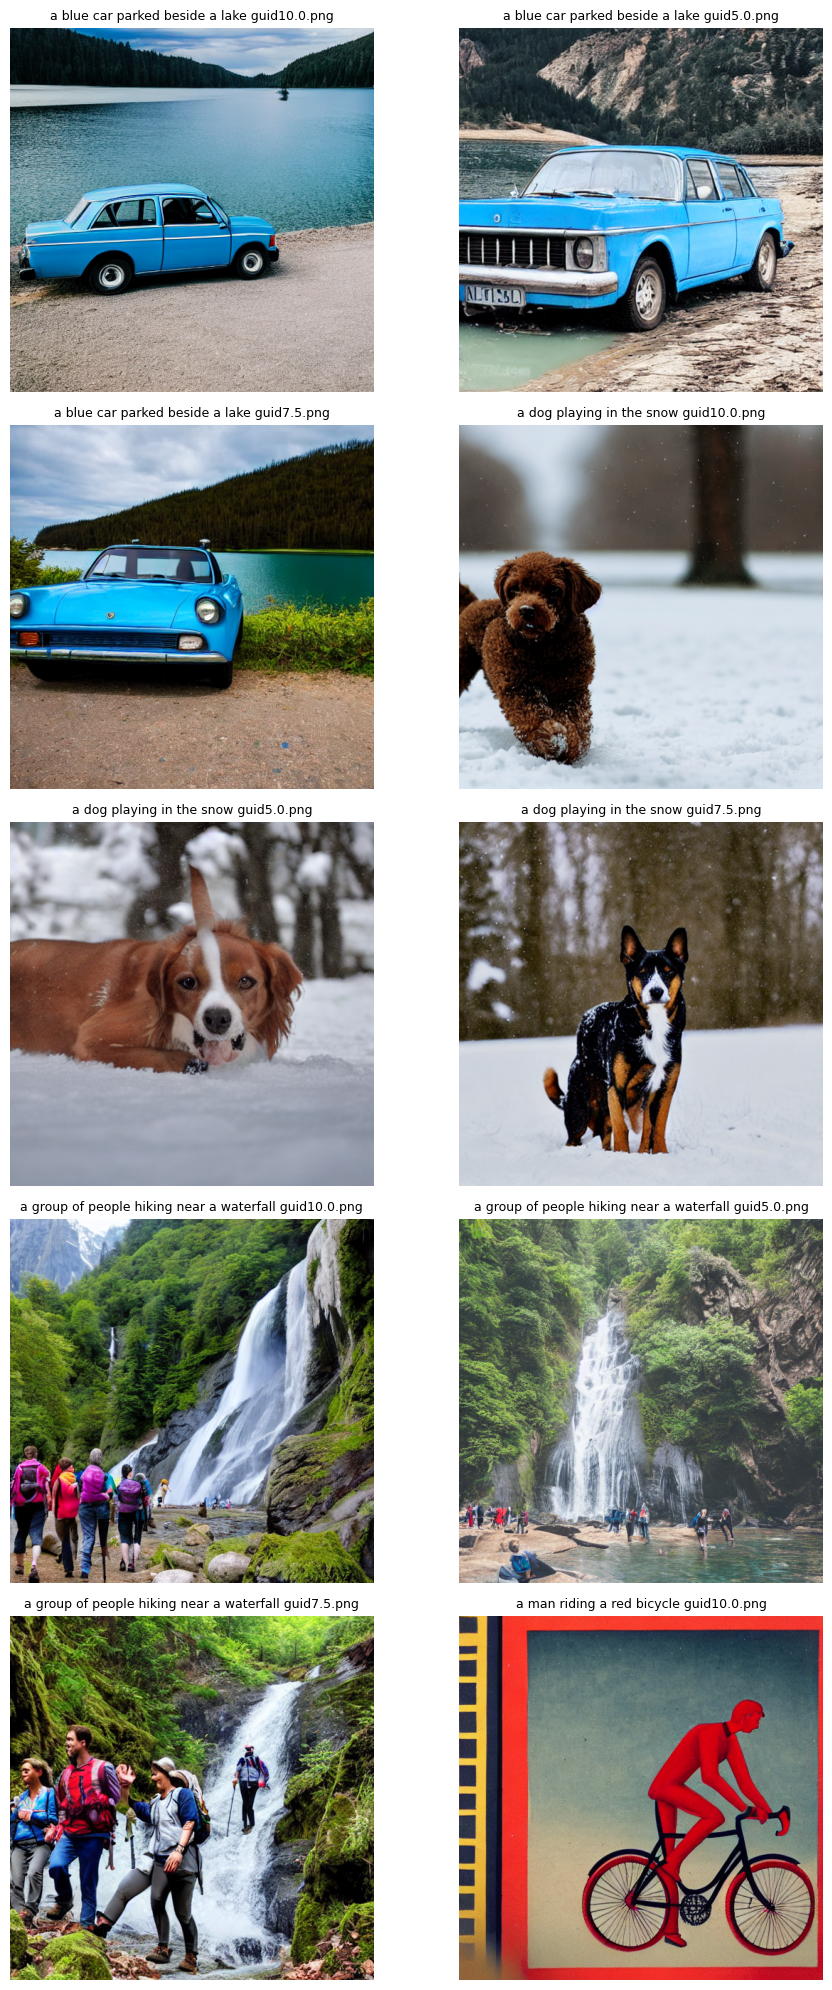

In [9]:
import matplotlib.pyplot as plt
from PIL import Image
import glob

images = sorted(glob.glob("outputs/milestone2/*.png"))[:10]  # show first 10
fig, axes = plt.subplots(5, 2, figsize=(10, 20))

for ax, img_path in zip(axes.flat, images):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(os.path.basename(img_path).replace("_", " "), fontsize=9)
    ax.axis("off")

plt.tight_layout()
plt.show()


### Additional Experiment: Effect of Inference Steps
We now examine how the number of diffusion steps (25 vs 50 vs 75) influences image quality and sharpness.


In [10]:
steps_list = [25, 50, 75]
prompt = "a woman in a red dress walking on a street"

for steps in steps_list:
    image = pipe(prompt, guidance_scale=7.5, num_inference_steps=steps).images[0]
    image.save(f"outputs/milestone2/{prompt.replace(' ','_')}_steps{steps}.png")
    print(f"Saved image with {steps} inference steps.")


  0%|          | 0/25 [00:00<?, ?it/s]

Saved image with 25 inference steps.


  0%|          | 0/50 [00:00<?, ?it/s]

Saved image with 50 inference steps.


  0%|          | 0/75 [00:00<?, ?it/s]

Saved image with 75 inference steps.


### Observations: Effect of Inference Steps
The comparison across 25, 50, and 75 inference steps shows a clear trade-off between image quality and runtime.  
- At **25 steps**, images appear slightly noisy with incomplete textures but generate quickly (~4 s).  
- At **50 steps**, overall sharpness and color consistency improve significantly.  
- At **75 steps**, the images are the smoothest and most detailed, though generation time nearly doubles.  

These findings align with diffusion theory: higher sampling steps allow more gradual denoising, improving fidelity at the cost of computational time.  
For subsequent milestones, 50 steps will be used as the baseline configuration for balancing quality and efficiency.


In [11]:
import pandas as pd
log = pd.read_csv("outputs/milestone2/training_log.csv")
display(log.head(10))


Prompt  Guidance  Steps  \
0                  a man riding a red bicycle       5.0     50   
1                  a man riding a red bicycle       7.5     50   
2                  a man riding a red bicycle      10.0     50   
3                   a dog playing in the snow       5.0     50   
4                   a dog playing in the snow       7.5     50   
5                   a dog playing in the snow      10.0     50   
6  a woman in a red dress walking on a street       5.0     50   
7  a woman in a red dress walking on a street       7.5     50   
8  a woman in a red dress walking on a street      10.0     50   
9   a group of people hiking near a waterfall       5.0     50   

                                            Filename  
0  outputs/milestone2/a_man_riding_a_red_bicycle_...  
1  outputs/milestone2/a_man_riding_a_red_bicycle_...  
2  outputs/milestone2/a_man_riding_a_red_bicycle_...  
3  outputs/milestone2/a_dog_playing_in_the_snow_g...  
4  outputs/milestone2/a_dog_playing_in_the_snow_g...  
5  outputs/milestone2/a_dog_playing_in_the_snow_g...  
6  outputs/milestone2/a_woman_in_a_red_dress_walk...  
7  outputs/milestone2/a_woman_in_a_red_dress_walk...  
8  outputs/milestone2/a_woman_in_a_red_dress_walk...  
9  outputs/milestone2/a_group_of_people_hiking_ne...

In [12]:
from google.colab import files
files.download("outputs/milestone2/training_log.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
import os

image_list = sorted(os.listdir("outputs/milestone2"))
for img in image_list:
    print(img)


a_blue_car_parked_beside_a_lake_guid10.0.png
a_blue_car_parked_beside_a_lake_guid5.0.png
a_blue_car_parked_beside_a_lake_guid7.5.png
a_dog_playing_in_the_snow_guid10.0.png
a_dog_playing_in_the_snow_guid5.0.png
a_dog_playing_in_the_snow_guid7.5.png
a_group_of_people_hiking_near_a_waterfall_guid10.0.png
a_group_of_people_hiking_near_a_waterfall_guid5.0.png
a_group_of_people_hiking_near_a_waterfall_guid7.5.png
a_man_riding_a_red_bicycle_guid10.0.png
a_man_riding_a_red_bicycle_guid5.0.png
a_man_riding_a_red_bicycle_guid7.5.png
a_woman_in_a_red_dress_walking_on_a_street_guid10.0.png
a_woman_in_a_red_dress_walking_on_a_street_guid5.0.png
a_woman_in_a_red_dress_walking_on_a_street_guid7.5.png
a_woman_in_a_red_dress_walking_on_a_street_steps25.png
a_woman_in_a_red_dress_walking_on_a_street_steps50.png
a_woman_in_a_red_dress_walking_on_a_street_steps75.png
training_log.csv


In [15]:
import os, shutil
from google.colab import files

# ✅ create a folder for selected submission images
os.makedirs("outputs/milestone2_selected", exist_ok=True)

# ✅ curated best 10 images
selected_images = [
    "a_blue_car_parked_beside_a_lake_guid7.5.png",
    "a_blue_car_parked_beside_a_lake_guid10.0.png",
    "a_dog_playing_in_the_snow_guid5.0.png",
    "a_dog_playing_in_the_snow_guid7.5.png",
    "a_group_of_people_hiking_near_a_waterfall_guid7.5.png",
    "a_group_of_people_hiking_near_a_waterfall_guid10.0.png",
    "a_man_riding_a_red_bicycle_guid7.5.png",
    "a_man_riding_a_red_bicycle_guid10.0.png",
    "a_woman_in_a_red_dress_walking_on_a_street_guid7.5.png",
    "a_woman_in_a_red_dress_walking_on_a_street_guid10.0.png"
]

# ✅ copy the files into the selected folder
for f in selected_images:
    shutil.copy(f"outputs/milestone2/{f}", f"outputs/milestone2_selected/{f}")

# ✅ create and download a zip file
shutil.make_archive("Milestone2_Selected_Images", "zip", "outputs/milestone2_selected")
files.download("Milestone2_Selected_Images.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>